In [68]:
from utils import *
plt.rcParams.update({'font.size': 16})

In [2]:
volume = load('data/volume.csv')
a = volume['GSCI'].rolling(12).mean()
b = volume['BCI'].rolling(12).mean()
sigma = (a+b)

In [3]:
betas = load('data/saved/betas-master.csv')

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests

In [38]:
t = grangercausalitytests(betas[['CRBI-MSCI_EM-smth']].join(sigma.rename('volume').pct_change()).dropna(), maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0166  , p=0.8976  , df_denom=152, df_num=1
ssr based chi2 test:   chi2=0.0169  , p=0.8965  , df=1
likelihood ratio test: chi2=0.0169  , p=0.8965  , df=1
parameter F test:         F=0.0166  , p=0.8976  , df_denom=152, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6923  , p=0.1876  , df_denom=149, df_num=2
ssr based chi2 test:   chi2=3.4981  , p=0.1739  , df=2
likelihood ratio test: chi2=3.4590  , p=0.1774  , df=2
parameter F test:         F=1.6923  , p=0.1876  , df_denom=149, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4882  , p=0.0628  , df_denom=146, df_num=3
ssr based chi2 test:   chi2=7.8224  , p=0.0498  , df=3
likelihood ratio test: chi2=7.6290  , p=0.0543  , df=3
parameter F test:         F=2.4882  , p=0.0628  , df_denom=146, df_num=3


In [6]:
t = grangercausalitytests(pd.DataFrame({'volume': sigma}).join(betas[['GSCI-MSCI_W-smth']]).dropna(), maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3648  , p=0.2445  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=1.3916  , p=0.2381  , df=1
likelihood ratio test: chi2=1.3854  , p=0.2392  , df=1
parameter F test:         F=1.3648  , p=0.2445  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4883  , p=0.6146  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=1.0092  , p=0.6037  , df=2
likelihood ratio test: chi2=1.0060  , p=0.6047  , df=2
parameter F test:         F=0.4883  , p=0.6146  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3328  , p=0.8016  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=1.0459  , p=0.7901  , df=3
likelihood ratio test: chi2=1.0424  , p=0.7910  , df=3
parameter F test:         F=0.3328  , p=0.8016  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4467  , p=0.7746  

In [7]:
df = load('data/master.csv').pct_change()
gsci = clean_series('GSCI', df)
msci = clean_series('MSCI_W', df)

In [8]:
from statsmodels.regression.rolling import RollingOLS
mod = RollingOLS(gsci, msci, window=60)
params = mod.fit(params_only=True)

<AxesSubplot:xlabel='date'>

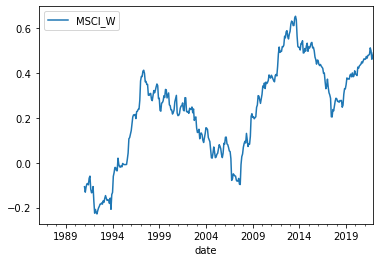

In [9]:
params.params.plot()

OLS param: 0.32324487266028334
KF mean: 0.1945977318721902
RMSE Random Walk: 0.9933042547314879
RMSE Rolling OLS: 0.9649854714870412
RMSE Kalman: 0.9140562731281827


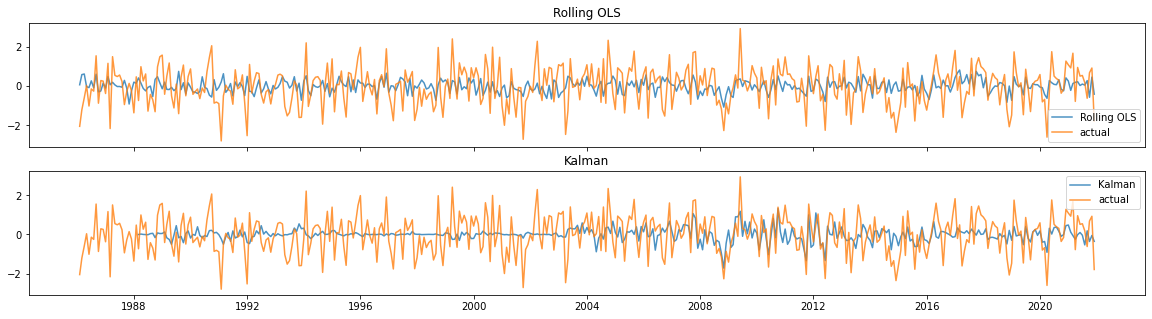

In [67]:
from utils.models import backtest
import statsmodels.api as sm
y = 'CRBI'
x = 'MSCI_EM'
df = df.dropna()
model = sm.OLS(clean_series(y, df)[y], clean_series(x, df)[x]).fit()
print(f'OLS param: {model.params[x]}')
print(f"KF mean: {betas[f'{y}-{x}-smth'].mean()}")
backtest(gsci['GSCI'], {'Rolling OLS': (model.params[x] * msci['MSCI_W']).dropna(),
                       'Kalman': load('data/saved/backtests-master.csv')[f'{y}-{x}-smth']}, plot=True)

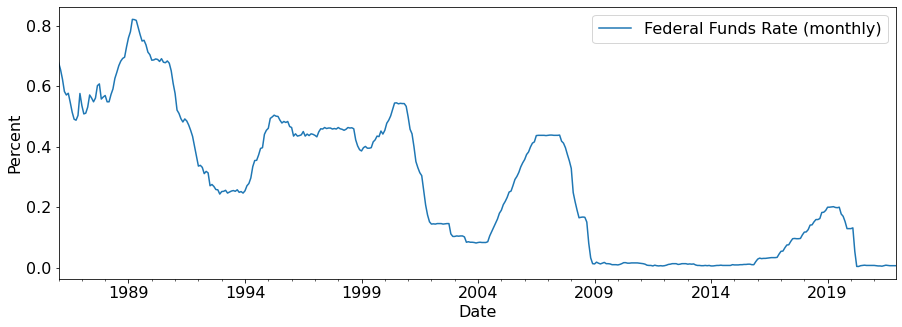

In [70]:
rates = load('data/FEDFUNDS.csv')
(rates['FEDFUNDS']['1980':]/12).plot(figsize=(15,5), label='Federal Funds Rate (monthly)')
plt.ylabel('Percent')
plt.xlabel('Date')
plt.legend()